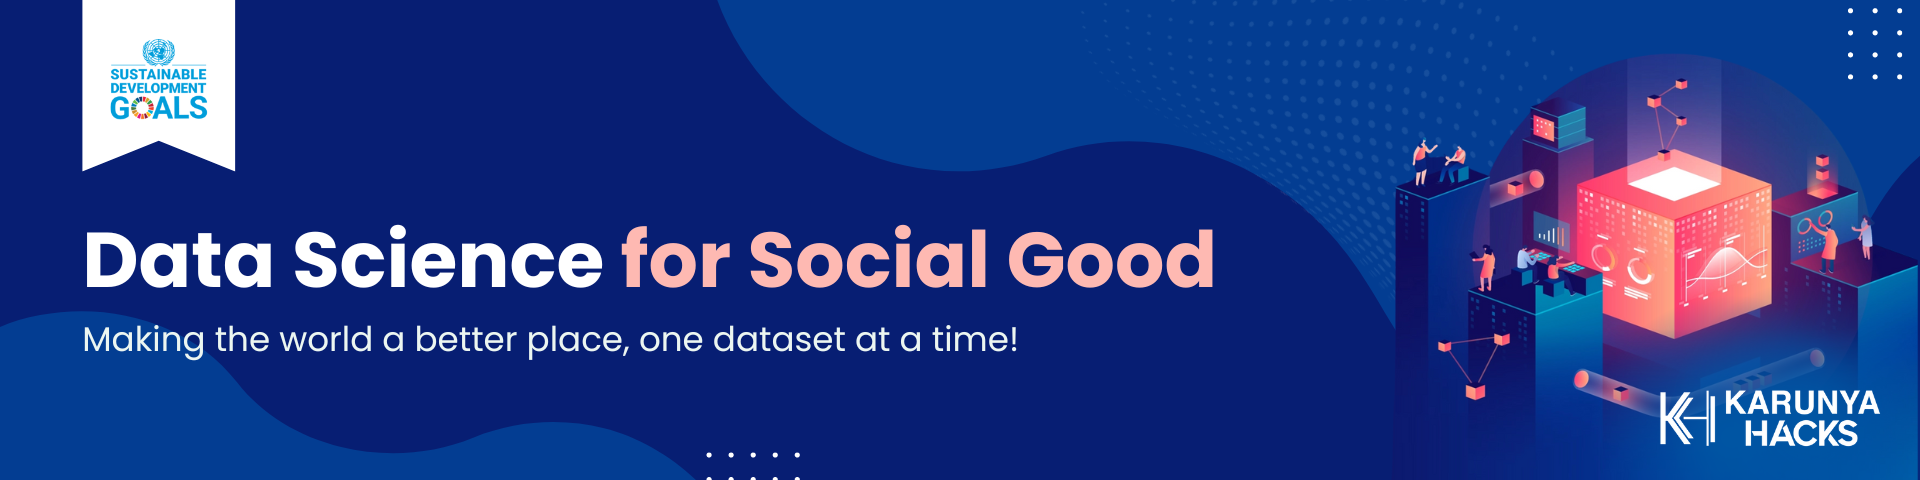

# Introducing Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

We will start our code sessions with the standard NumPy and Pandas imports:

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
#For temporary storage directly upload the file on colab
path = 'drive/My Drive/Colab Notebooks/Toyota.csv'
import pandas as pd
#Can write the path directly as well
df = pd.read_csv(path)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
494,11950,54,58745,Petrol,110,1,0,1600,4,1035
495,11250,52,58596,Petrol,110,1,0,1600,3,1045
496,11750,54,58530,Petrol,110,0,0,1600,5,1075
497,10950,55,58377,Petrol,110,1,0,1600,3,1050


In [4]:
#NaN - Not a Number
df = pd.read_csv(path, index_col = 0, na_values=['??', '????'])
#Here unnnamed col got removed and all the ?? and ???? got changed to NaN

In [5]:
#To read all values -> (all), dont forget the bracket
print(df.to_string())

       Age      KM FuelType   HP  MetColor  Automatic    CC  Doors  Weight
Price                                                                     
13500   23   46986   Diesel   90         1          0  2000      3    1165
13750   23   72937   Diesel   90         1          0  2000      3    1165
13950   24   41711   Diesel   90         1          0  2000      3    1165
14950   26   48000   Diesel   90         0          0  2000      3    1165
13750   30   38500   Diesel   90         0          0  2000      3    1170
12950   32   61000   Diesel   90         0          0  2000      3    1170
16900   27   94612   Diesel   90         1          0  2000      3    1245
18600   30   75889   Diesel   90         1          0  2000      3    1245
21500   27   19700   Petrol  192         0          0  1800      3    1185
12950   23   71138   Diesel   69         0          0  1900      3    1105
20950   25   31461   Petrol  192         0          0  1800      3    1185
19950   22   43610   Petr

In [6]:
#To read only first 5 rows
df.head()
#To read only last 5 rows
df.tail()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
Price,,,,,,,,,
11950,54,58745,Petrol,110,1,0,1600,4,1035
11250,52,58596,Petrol,110,1,0,1600,3,1045
11750,54,58530,Petrol,110,0,0,1600,5,1075
10950,55,58377,Petrol,110,1,0,1600,3,1050
11250,56,58142,Petrol,110,1,0,1600,5,1080


In [ ]:
#row numbers/names dont write index()
df.index

In [ ]:
#column numbers/names dont write columns()
df.columns

# Data Manipulation on Toyota.csv

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [13]:
path = 'drive/My Drive/Colab Notebooks/Toyota.csv'
import pandas as pd
df = pd.read_csv(path,  na_values=['??', '????'])

Question 1: Find maximum value in a KM column and the minimum value in 

weight column

In [14]:
KM = df['KM']
print(f'Maximum value in KM column: {max(KM)}')
weight = df['Weight']
print(f'Minimum value in weight column: {min(weight)}')

Maximum value in KM column: 243000
Minimum value in weight column: 1015


Question 2: Find the mean and median of CC column

In [15]:
cc = df['CC']
mean = cc.mean()
median = cc.median()
print(f'CC Mean: {mean}')
print(f'CC Median: {median}')

CC Mean: 1610.3587174348697
CC Median: 1600.0


Question 3: Create the new column ‘Current Price ‘with value Current Price = (Price*2) +100

In [16]:
df['Current Price'] = (df['Price'] * 2) + 100
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Current Price
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,27100
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,27600
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,28000
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,30000
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,27600
...,...,...,...,...,...,...,...,...,...,...,...
494,11950,54,58745,Petrol,110,1,0,1600,4,1035,24000
495,11250,52,58596,Petrol,110,1,0,1600,3,1045,22600
496,11750,54,58530,Petrol,110,0,0,1600,5,1075,23600
497,10950,55,58377,Petrol,110,1,0,1600,3,1050,22000


Question 4: Display the first 50 Price, Age and CC such that age in ascending order

In [17]:
first_50 = df.head(50)
first_50.sort_values(by=['Age'], ascending=False)
first_50[['Age', 'Price','CC']]

,Age,Price,CC
0,23,13500,2000
1,23,13750,2000
2,24,13950,2000
3,26,14950,2000
4,30,13750,2000
5,32,12950,2000
6,27,16900,2000
7,30,18600,2000
8,27,21500,1800
9,23,12950,1900


Question 5: Group the data frame by Fuel Type and Metal Colour

In [18]:
groups = df.groupby(['FuelType','MetColor'])
groups.first()

Price  Age      KM   HP  Automatic    CC  Doors  Weight  \
FuelType MetColor                                                            
CNG      0          7750   43  178858  110          0  1600      3    1084   
         1         11950   39   98823  110          0  1600      5    1119   
Diesel   0         14950   26   48000   90          0  2000      3    1165   
         1         13500   23   46986   90          0  2000      3    1165   
Petrol   0         21500   27   19700  192          0  1800      3    1185   
         1         21500   31   23000  192          0  1800      3    1185   

                   Current Price  
FuelType MetColor                 
CNG      0                 15600  
         1                 24000  
Diesel   0                 30000  
         1                 27100  
Petrol   0                 43100  
         1                 43100

Question 6: Count the null values in the data frame and fill the null values in CC column by ‘0’

In [19]:
import numpy as np
count_nan = df.isna().sum().sum()
print(f'The total number of null values: {count_nan}')
cc = df['CC']
cc.replace(np.nan,0)

The total number of null values: 0


0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
494    1600
495    1600
496    1600
497    1600
498    1600
Name: CC, Length: 499, dtype: int64

Question 7: Append 3 new rows in the data frame and display it

In [20]:
temp = df
#if we write only temp.append then it doesnt work
temp = temp.append({'Price': 9000, 'Age': 33.0, 'KM': 789.09, 'FuelType': 'Petrol', 'HP': 110.0, 'MetColor': 1.0, 'Automatic': 0, 'CC': 1700, 'Doors': 4, 'Weight': 1040, 'Current Price': 22220}, ignore_index = True)
temp = temp.append({'Price': 8000, 'Age': 12.0, 'KM': 423.59, 'FuelType': 'Petrol', 'HP': 111.0, 'MetColor': 0.0, 'Automatic': 0, 'CC': 1600, 'Doors': 3, 'Weight': 1450, 'Current Price': 67220}, ignore_index = True)
temp = temp.append({'Price': 7000, 'Age': 37.0, 'KM': 459.09, 'FuelType': 'Petrol', 'HP': 112.0, 'MetColor': 2.0, 'Automatic': 0, 'CC': 1500, 'Doors': 2, 'Weight': 1500, 'Current Price': 27220}, ignore_index = True)
temp.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Current Price
497,10950,55.0,58377.00,Petrol,110.0,1.0,0,1600,3,1050,22000
498,11250,56.0,58142.00,Petrol,110.0,1.0,0,1600,5,1080,22600
499,9000,33.0,789.09,Petrol,110.0,1.0,0,1700,4,1040,22220
500,8000,12.0,423.59,Petrol,111.0,0.0,0,1600,3,1450,67220
501,7000,37.0,459.09,Petrol,112.0,2.0,0,1500,2,1500,27220


Question 8: Drop the HP column in the data frame and display it

In [21]:
temp = df.copy()
temp.drop(['Price'], axis = 1)
price = df['Price']
price
temp['Price'] = price
temp

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Current Price
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,27100
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,27600
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,28000
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,30000
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,27600
...,...,...,...,...,...,...,...,...,...,...,...
494,11950,54,58745,Petrol,110,1,0,1600,4,1035,24000
495,11250,52,58596,Petrol,110,1,0,1600,3,1045,22600
496,11750,54,58530,Petrol,110,0,0,1600,5,1075,23600
497,10950,55,58377,Petrol,110,1,0,1600,3,1050,22000


Question 9: Drop the 50th and 100th row in the data frame

In [22]:
temp.drop([50, 100], axis = 0)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Current Price
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,27100
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,27600
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,28000
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,30000
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,27600
...,...,...,...,...,...,...,...,...,...,...,...
494,11950,54,58745,Petrol,110,1,0,1600,4,1035,24000
495,11250,52,58596,Petrol,110,1,0,1600,3,1045,22600
496,11750,54,58530,Petrol,110,0,0,1600,5,1075,23600
497,10950,55,58377,Petrol,110,1,0,1600,3,1050,22000


Question 10: Display the price, KM and HP of first 100 values with 'CC' greater than 1600

In [110]:
copy1 = temp["Price","KM","HP"].head(100)
print(copy1)

KeyError: ignored

# Exploratory Data Analysis on Employee Data


In [23]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [24]:
path='drive/My Drive/Colab Notebooks/Emp_EDA.csv'
#For temporary storage directly upload the file on colab
import pandas as pd
#Can write the path directly as well
df = pd.read_csv(path)
df

,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Bonus,Senior Management
0,Maria,Female,130590,Finance,NaN,5,146075.36220,20000,False
1,Angela,Female,54568,Business Development,27.0,5,64675.63064,19000,True
2,Allan,Male,125792,Client Services,28.0,6,132134.43260,18500,False
3,Rohan,Female,45906,Finance,28.0,7,51230.17788,18000,True
4,Douglas,Male,97308,Marketing,28.0,7,104066.04060,17000,True
5,Brandon,Male,112807,Human Resources,30.0,8,132539.20040,16000,True
6,Diana,Female,132940,Client Services,31.0,9,158307.61080,15800,False
7,Frances,NaN,139852,Business Development,34.0,10,150374.46450,15500,True
8,Matthew,Male,100612,Marketing,34.0,10,114340.50740,15000,False
9,Larry,Male,101004,Client Services,35.0,11,102406.94560,14700,True


1. Remove the irrelevant column &#39;Senior Management&#39; (inplace=True)

In [26]:
df.pop('Senior Management')
df 

,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Bonus
0,Maria,Female,130590,Finance,NaN,5,146075.36220,20000
1,Angela,Female,54568,Business Development,27.0,5,64675.63064,19000
2,Allan,Male,125792,Client Services,28.0,6,132134.43260,18500
3,Rohan,Female,45906,Finance,28.0,7,51230.17788,18000
4,Douglas,Male,97308,Marketing,28.0,7,104066.04060,17000
5,Brandon,Male,112807,Human Resources,30.0,8,132539.20040,16000
6,Diana,Female,132940,Client Services,31.0,9,158307.61080,15800
7,Frances,NaN,139852,Business Development,34.0,10,150374.46450,15500
8,Matthew,Male,100612,Marketing,34.0,10,114340.50740,15000
9,Larry,Male,101004,Client Services,35.0,11,102406.94560,14700


2. Remove the duplicate rows and analyze

In [27]:
df.drop_duplicates(subset='First Name',keep='first',inplace=True)
df

,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Bonus
0,Maria,Female,130590,Finance,NaN,5,146075.36220,20000
1,Angela,Female,54568,Business Development,27.0,5,64675.63064,19000
2,Allan,Male,125792,Client Services,28.0,6,132134.43260,18500
3,Rohan,Female,45906,Finance,28.0,7,51230.17788,18000
4,Douglas,Male,97308,Marketing,28.0,7,104066.04060,17000
5,Brandon,Male,112807,Human Resources,30.0,8,132539.20040,16000
6,Diana,Female,132940,Client Services,31.0,9,158307.61080,15800
7,Frances,NaN,139852,Business Development,34.0,10,150374.46450,15500
8,Matthew,Male,100612,Marketing,34.0,10,114340.50740,15000
9,Larry,Male,101004,Client Services,35.0,11,102406.94560,14700


3. Rename the column Bonus to Incentive

In [28]:
df.rename(columns={'Bonus':'Incentive'},inplace=True)
df

,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Incentive
0,Maria,Female,130590,Finance,NaN,5,146075.36220,20000
1,Angela,Female,54568,Business Development,27.0,5,64675.63064,19000
2,Allan,Male,125792,Client Services,28.0,6,132134.43260,18500
3,Rohan,Female,45906,Finance,28.0,7,51230.17788,18000
4,Douglas,Male,97308,Marketing,28.0,7,104066.04060,17000
5,Brandon,Male,112807,Human Resources,30.0,8,132539.20040,16000
6,Diana,Female,132940,Client Services,31.0,9,158307.61080,15800
7,Frances,NaN,139852,Business Development,34.0,10,150374.46450,15500
8,Matthew,Male,100612,Marketing,34.0,10,114340.50740,15000
9,Larry,Male,101004,Client Services,35.0,11,102406.94560,14700


4. Calculate the central tendency measures for &#39;Experience&#39;

In [29]:
print('Mean',df['Experience'].mean())
print('Median',df['Experience'].median())
print('Mode',df['Experience'].mode())

Mean 13.166666666666666
Median 12.0
Mode 0     5
1     7
2    10
3    11
4    12
5    13
6    15
dtype: int64


5. Calculate the variability measures for &#39;Experience&#39;

In [ ]:
min=df['Experience'].min()
max=df['Experience'].max()
print(min,max)
print('Range',max-min)
print('var',df['Experience'].var())
print('std',df['Experience'].std())

5 26
Range 21
var 38.14492753623188
std 6.176157991521257


6. Calculate the IQR using quantile for &#39;Experience&#39;

In [30]:
Q1=df['Experience'].quantile(.25)
Q3=df['Experience'].quantile(.75)
print('IQR',Q3-Q1)

IQR 7.0


7. Calculate the z-score for &#39;Experience’

In [ ]:
import scipy.stats as stats
Zscore=stats.zscore(df['Experience'])
print('Zscore',Zscore)

Zscore 0    -1.350729
1    -1.350729
2    -1.185333
3    -1.019938
4    -1.019938
5    -0.854543
6    -0.689147
7    -0.523752
8    -0.523752
9    -0.358357
10   -0.358357
11   -0.192961
12   -0.192961
13   -0.027566
14   -0.027566
15    0.137829
16    0.303225
17    0.303225
18    0.799411
19    1.130202
20    1.295597
21    1.626388
22    1.957178
23    2.122574
Name: Experience, dtype: float64


8. Add 2 rows at the end of the dataframe with the given values
{&#39;First Name&#39;:&#39;Zion&#39;, &#39;Gender&#39;:&#39;Male&#39;, &#39;Team&#39;:&#39;Finance&#39;, &#39;Age&#39;:37,
&#39;Experience&#39;:90,&#39;New_Salary&#39;:146075.4, &#39;Incentive&#39;:20000
{&#39;First Name&#39;:&#39;Frances&#39;, &#39;Gender&#39;:&#39;Male&#39;, &#39;Salary&#39;:139852, &#39;Team&#39;:&#39;Business
Development&#39;, &#39;Age&#39;:34, &#39;Experience&#39;:95, &#39;New_Salary&#39;:150374.5, &#39;Incentive&#39;:15500

In [ ]:
df1={'First Name':'Zion', 'Gender':'Male', 'Team':'Finance', 'Age':37, 'Experience':90,'New_Salary':146075.4, 'Incentive':20000 }
df2= {'First Name':'Frances', 'Gender':'Male', 'Salary':139852, 'Team':'Business Development', 'Age':34, 'Experience':95, 'New_Salary':150374.5, 'Incentive':15500}
df=df.append(df1,ignore_index=True)
df=df.append(df2,ignore_index=True)
#df.tail()
df


,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Incentive
0,Maria,Female,130590.0,Finance,NaN,5,146075.36220,20000
1,Angela,Female,54568.0,Business Development,27.0,5,64675.63064,19000
2,Allan,Male,125792.0,Client Services,28.0,6,132134.43260,18500
3,Rohan,Female,45906.0,Finance,28.0,7,51230.17788,18000
4,Douglas,Male,97308.0,Marketing,28.0,7,104066.04060,17000
5,Brandon,Male,112807.0,Human Resources,30.0,8,132539.20040,16000
6,Diana,Female,132940.0,Client Services,31.0,9,158307.61080,15800
7,Frances,NaN,139852.0,Business Development,34.0,10,150374.46450,15500
8,Matthew,Male,100612.0,Marketing,34.0,10,114340.50740,15000
9,Larry,Male,101004.0,Client Services,35.0,11,102406.94560,14700


9. Replace nan value with given value (Salary=130590)

In [ ]:
import numpy as np
df['Salary'].replace(to_replace=np.nan,value=130590,inplace =True)
df

,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Incentive
0,Maria,Female,130590.0,Finance,NaN,5,146075.36220,20000
1,Angela,Female,54568.0,Business Development,27.0,5,64675.63064,19000
2,Allan,Male,125792.0,Client Services,28.0,6,132134.43260,18500
3,Rohan,Female,45906.0,Finance,28.0,7,51230.17788,18000
4,Douglas,Male,97308.0,Marketing,28.0,7,104066.04060,17000
5,Brandon,Male,112807.0,Human Resources,30.0,8,132539.20040,16000
6,Diana,Female,132940.0,Client Services,31.0,9,158307.61080,15800
7,Frances,NaN,139852.0,Business Development,34.0,10,150374.46450,15500
8,Matthew,Male,100612.0,Marketing,34.0,10,114340.50740,15000
9,Larry,Male,101004.0,Client Services,35.0,11,102406.94560,14700


10. Replace the nan value in Slary Column with previous value, next value, linear
interpolation and central tendency measures.

In [ ]:
#replacing with the previous value
df['Salary'].fillna(method="ffill")
df

,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Incentive
0,Maria,Female,130590.0,Finance,NaN,5,146075.36220,20000
1,Angela,Female,54568.0,Business Development,27.0,5,64675.63064,19000
2,Allan,Male,125792.0,Client Services,28.0,6,132134.43260,18500
3,Rohan,Female,45906.0,Finance,28.0,7,51230.17788,18000
4,Douglas,Male,97308.0,Marketing,28.0,7,104066.04060,17000
5,Brandon,Male,112807.0,Human Resources,30.0,8,132539.20040,16000
6,Diana,Female,132940.0,Client Services,31.0,9,158307.61080,15800
7,Frances,NaN,139852.0,Business Development,34.0,10,150374.46450,15500
8,Matthew,Male,100612.0,Marketing,34.0,10,114340.50740,15000
9,Larry,Male,101004.0,Client Services,35.0,11,102406.94560,14700


In [ ]:
#replacing with the next value
df['Salary'].fillna(method="bfill")
df

,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Incentive
0,Maria,Female,130590.0,Finance,NaN,5,146075.36220,20000
1,Angela,Female,54568.0,Business Development,27.0,5,64675.63064,19000
2,Allan,Male,125792.0,Client Services,28.0,6,132134.43260,18500
3,Rohan,Female,45906.0,Finance,28.0,7,51230.17788,18000
4,Douglas,Male,97308.0,Marketing,28.0,7,104066.04060,17000
5,Brandon,Male,112807.0,Human Resources,30.0,8,132539.20040,16000
6,Diana,Female,132940.0,Client Services,31.0,9,158307.61080,15800
7,Frances,NaN,139852.0,Business Development,34.0,10,150374.46450,15500
8,Matthew,Male,100612.0,Marketing,34.0,10,114340.50740,15000
9,Larry,Male,101004.0,Client Services,35.0,11,102406.94560,14700


In [ ]:
df['Salary'].interpolate(method='linear',limit_direction='forward')

0     130590.0
1      54568.0
2     125792.0
3      45906.0
4      97308.0
5     112807.0
6     132940.0
7     139852.0
8     100612.0
9     101004.0
10     90816.0
11     72000.0
12     64714.0
13    115163.0
14     97950.0
15     61933.0
16    111737.0
17    109831.0
18     90370.0
19     41426.0
20     63241.0
21     81014.0
22     65476.0
23     59414.0
24    130590.0
25    139852.0
Name: Salary, dtype: float64

In [ ]:
df.fillna(df['Age'].mean())

,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Incentive
0,Maria,Female,130590.0,Finance,37.16,5,146075.36220,20000
1,Angela,Female,54568.0,Business Development,27.00,5,64675.63064,19000
2,Allan,Male,125792.0,Client Services,28.00,6,132134.43260,18500
3,Rohan,Female,45906.0,Finance,28.00,7,51230.17788,18000
4,Douglas,Male,97308.0,Marketing,28.00,7,104066.04060,17000
5,Brandon,Male,112807.0,Human Resources,30.00,8,132539.20040,16000
6,Diana,Female,132940.0,Client Services,31.00,9,158307.61080,15800
7,Frances,37.16,139852.0,Business Development,34.00,10,150374.46450,15500
8,Matthew,Male,100612.0,Marketing,34.00,10,114340.50740,15000
9,Larry,Male,101004.0,Client Services,35.00,11,102406.94560,14700


11. Detect the outliers in updated &#39;Experience&#39; with boxplot.

Mean 19.26923076923077
Median 12.5
Mode 0     5
1     7
2    10
3    11
4    12
5    13
6    15
dtype: int64


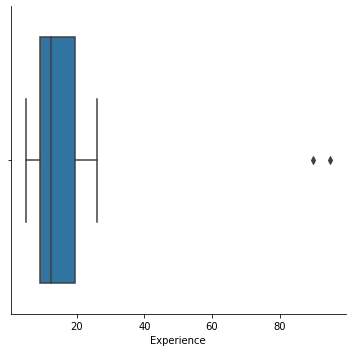

In [ ]:
import seaborn as sns
sns.catplot(x='Experience',kind='box',data=df)
print('Mean',df['Experience'].mean())
print( 'Median' ,df['Experience'].median())
print( 'Mode' ,df[ 'Experience' ].mode())

12. Remove the outliers using IQR by recalculating IQR in updated &#39; Experience &#39; and
analyse with boxplot

IQR 10.75


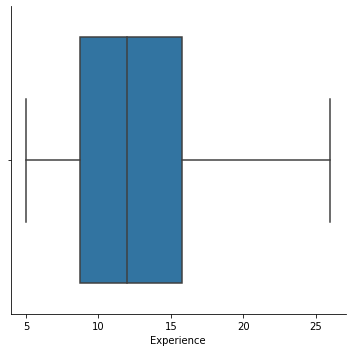

In [ ]:
Ql=df['Experience'].quantile(.25)
Q3=df['Experience'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['Experience']>lb) & (df['Experience']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='Experience',kind='box',data=dfout)

13. Remove the outliers using z-score by recalculating z-score in updated &#39; Experience &#39;
and analyse with boxplot

Zscore 0    -0.650540
1    -0.650540
2    -0.604949
3    -0.559359
4    -0.559359
5    -0.513769
6    -0.468178
7    -0.422588
8    -0.422588
9    -0.376998
10   -0.376998
11   -0.331407
12   -0.331407
13   -0.285817
14   -0.285817
15   -0.240226
16   -0.194636
17   -0.194636
18   -0.057865
19    0.033316
20    0.078906
21    0.170087
22    0.261268
23    0.306858
24    3.224644
25    3.452596
Name: Experience, dtype: float64


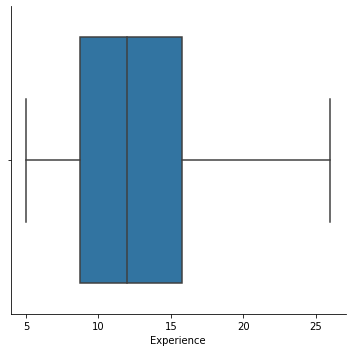

In [ ]:
zscore=stats.zscore(df['Experience'])
print('Zscore',zscore)

filter=((zscore > -1) &(zscore < 2))
newdf=df[filter]
newdf.tail()
sns.catplot(x='Experience',kind='box',data=newdf)

14. Plot the heatmap using the correlation

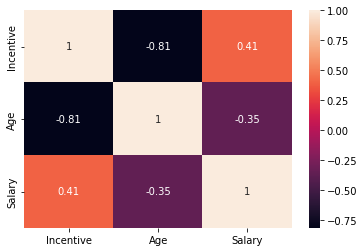

In [ ]:
import seaborn as sns
t=df[['Incentive','Age','Salary']]
c=t.corr()
sns.heatmap(c,xticklabels=c.columns,annot=True)

15. Drop the last two rows added in the dataframe

In [ ]:
df.drop(df.tail(2).index,inplace = True)
df

,First Name,Gender,Salary,Team,Age,Experience,New_Salary,Incentive
0,Maria,Female,130590.0,Finance,NaN,5,146075.36220,20000
1,Angela,Female,54568.0,Business Development,27.0,5,64675.63064,19000
2,Allan,Male,125792.0,Client Services,28.0,6,132134.43260,18500
3,Rohan,Female,45906.0,Finance,28.0,7,51230.17788,18000
4,Douglas,Male,97308.0,Marketing,28.0,7,104066.04060,17000
5,Brandon,Male,112807.0,Human Resources,30.0,8,132539.20040,16000
6,Diana,Female,132940.0,Client Services,31.0,9,158307.61080,15800
7,Frances,NaN,139852.0,Business Development,34.0,10,150374.46450,15500
8,Matthew,Male,100612.0,Marketing,34.0,10,114340.50740,15000
9,Larry,Male,101004.0,Client Services,35.0,11,102406.94560,14700


# Data Visualization on Employee Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [31]:
path = 'drive/My Drive/Colab Notebooks/Emp_visu.csv'
import pandas as pd
df = pd.read_csv(path)
df

,First Name,Gender,Salary,Bonus %,Senior Management,Team,Age,Experience,New_Salary,Incentive
0,Maria,Female,130590,11.858,0,Finance,26,5,146075.36220,20000
1,Angela,Female,54568,18.523,1,Business Development,27,5,64675.63064,19000
2,Allan,Male,125792,5.042,0,Client Services,28,6,132134.43260,18500
3,Rohan,Female,45906,11.598,1,Finance,28,7,51230.17788,18000
4,Douglas,Male,97308,6.945,1,Marketing,28,7,104066.04060,17000
5,Brandon,Male,112807,17.492,1,Human Resources,30,8,132539.20040,16000
6,Diana,Female,132940,19.082,0,Client Services,31,9,158307.61080,15800
7,Frances,Female,139852,7.524,1,Business Development,34,10,150374.46450,15500
8,Matthew,Male,100612,13.645,0,Marketing,34,10,114340.50740,15000
9,Larry,Male,101004,1.389,1,Client Services,35,11,102406.94560,14700


1. Draw a bar chart with Team and its count (use different colors for each team)

Client Services         5
Finance                 4
Product                 4
Business Development    3
Marketing               3
Human Resources         3
Legal                   3
Name: Team, dtype: int64


<BarContainer object of 7 artists>

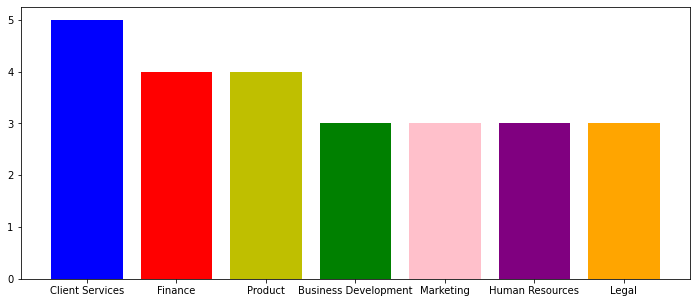

In [32]:
#bar plot with fuel type with its count(use diff colors for each fuel)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
data = df['Team'].value_counts()
print(data)
plt.bar(data.index, data.values, color = ['b', 'r', 'y','g','pink','purple', 'orange'])

2. Draw a comparative bar chart for Salary and New_Salary against each person (first 15 persons)

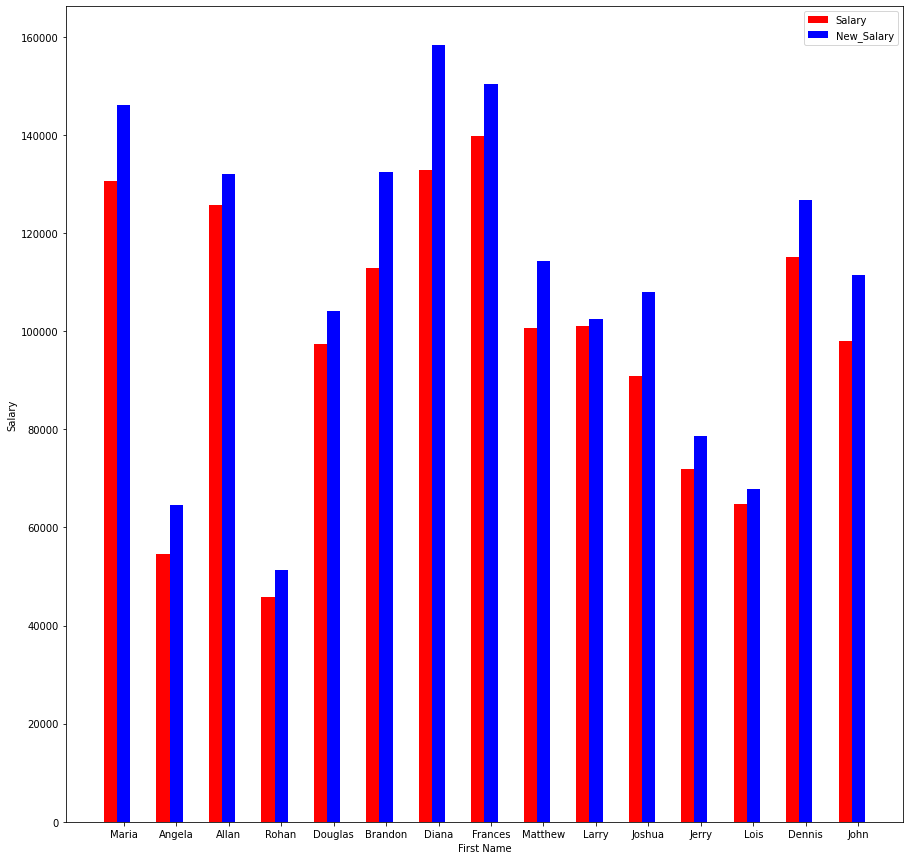

In [100]:
import numpy as np
N = 15
plt.figure(figsize = (15, 15))
#see the spelling of arrange
ind = np.arange(N)
width = 0.25

xval = df['Salary'].head(15)
bar1 = plt.bar(ind, xval, width, color = 'r')
yval = df['New_Salary'].head(15)
bar2 = plt.bar(ind + width, yval, width, color = 'b')

#comparitive charts should always have legends

plt.xlabel('First Name')
plt.ylabel('Salary')
plt.xticks(ind + width, df['First Name'].head(15))
plt.legend((bar1, bar2),('Salary', 'New_Salary'))


3. Draw a horizontal bar chart for Team and Salary

Text(0, 0.5, 'Salary')

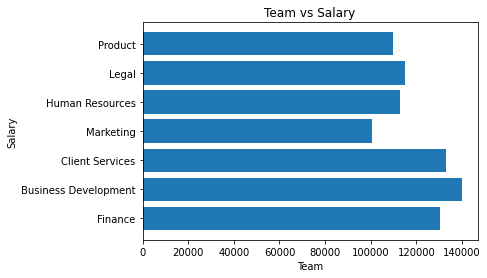

In [ ]:
plt.barh(df['Team'],df['Salary'] )
plt.title("Team vs Salary")
plt.xlabel("Team")
plt.ylabel("Salary")

4.Draw a stacked bar chart for Salary and New_price against the person (first 10 persons)

<BarContainer object of 10 artists>

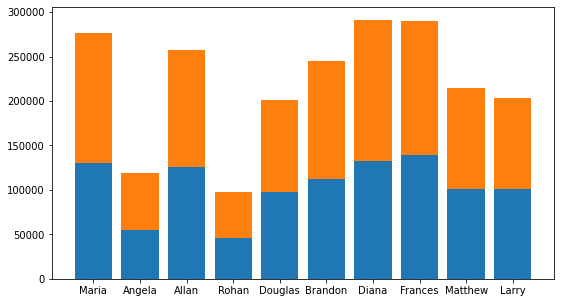

In [ ]:
plt.figure(figsize=(9,5))
plt.bar(df['First Name'].head(10), df['Salary'].head(10))
plt.bar(df['First Name'].head(10), df['New_Salary'].head(10), bottom = df['Salary'].head(10))

5. Draw a pie chart with Gender and its count

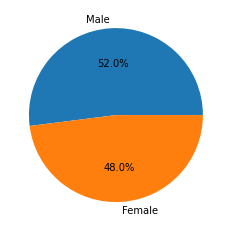

In [ ]:
data = df['Gender'].value_counts()
plt.pie(data.values, labels = data.index, autopct = "%1.1f%%");

6. Draw the dot plot between person and experience (first 15 persons)

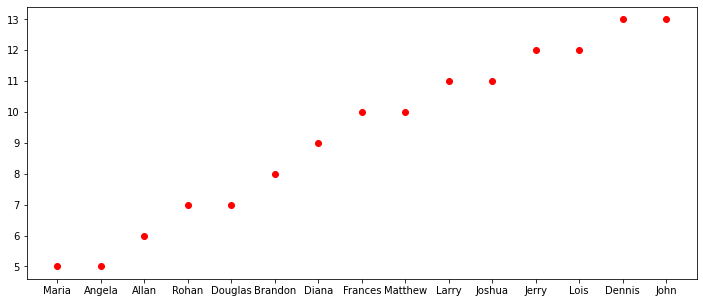

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df['First Name'].head(15), df['Experience'].head(15),linewidth=0, marker = 'o', color = 'red')

7. Draw the line plot between age and experience. Observe the trend line.

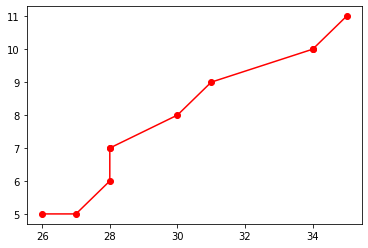

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Age'].head(10), df['Experience'].head(10), marker = 'o', color = 'red')

8. Draw the scatter plot between Salary and New_Salary. Observe the correlation

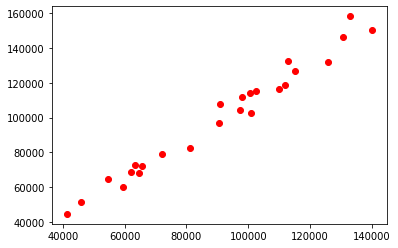

In [ ]:
x = df['Salary']
y = df['New_Salary']
plt.scatter(x, y, c = 'red')
#it is a positive correlation

9. Draw the scatter plot between Age and Incentive. Observe the correlation

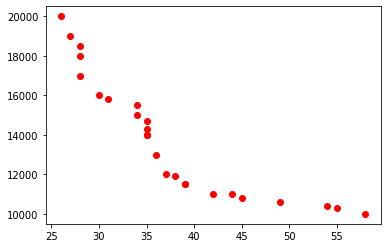

In [ ]:
x = df['Age']
y = df['Incentive']
plt.scatter(x, y, c = 'red')
#it is a negative correlation

10. Draw the box plot to show the statistical summary of Age column and verify with describe()

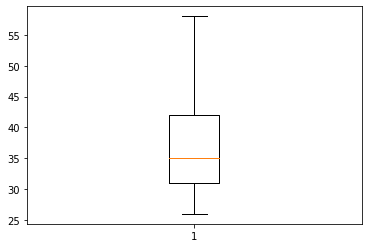

In [ ]:
plt.boxplot(df['Age']);

11. Draw the histogram plot for Experience column

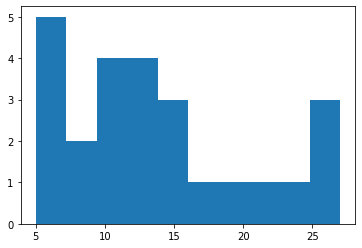

In [ ]:
plt.hist(df['Experience']);

12. Draw the histogram plot for Experience column with bin value and PDF


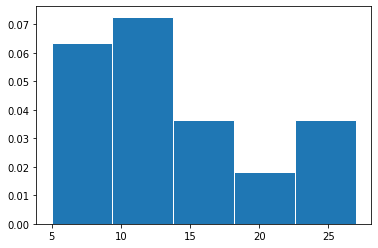

In [ ]:
plt.hist(df['Experience'], edgecolor = 'white', bins = 5, density = True);

In [33]:
first_100 = temp.head(100)
ans = first_100[first_100['CC'] > 1600] 
print(ans)

    Price  Age      KM FuelType   HP  MetColor  Automatic    CC  Doors  \
0   13500   23   46986   Diesel   90         1          0  2000      3   
1   13750   23   72937   Diesel   90         1          0  2000      3   
2   13950   24   41711   Diesel   90         1          0  2000      3   
3   14950   26   48000   Diesel   90         0          0  2000      3   
4   13750   30   38500   Diesel   90         0          0  2000      3   
5   12950   32   61000   Diesel   90         0          0  2000      3   
6   16900   27   94612   Diesel   90         1          0  2000      3   
7   18600   30   75889   Diesel   90         1          0  2000      3   
8   21500   27   19700   Petrol  192         0          0  1800      3   
9   12950   23   71138   Diesel   69         0          0  1900      3   
10  20950   25   31461   Petrol  192         0          0  1800      3   
11  19950   22   43610   Petrol  192         0          0  1800      3   
12  19600   25   32189   Petrol  192  

In [54]:
import pandas as pd
df3 = pd.read_excel("Titanic_visu.xlsx")
df3.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Concession,New_Fare
0,0,0,3,Braund,male,22,A/5 21171,53.100,S,16.1,61.6491
1,1,1,1,Cumings,female,38,PC 17599,13.000,C,17.5,15.2750
2,2,1,3,Heikkinen,female,26,STON/O2. 3101282,31.275,S,16.4,36.4041
3,3,1,1,Futrelle,female,35,113803,18.000,S,17.4,21.1320
4,4,0,3,Allen,male,35,373450,16.700,S,17.4,19.6058


<class 'pandas.core.series.Series'> S    17
Q     5
C     3
Name: Embarked, dtype: int64


<BarContainer object of 3 artists>

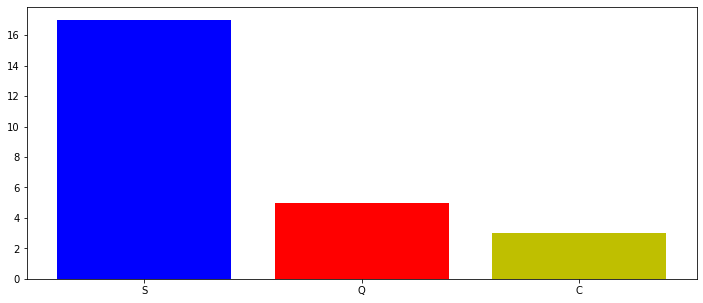

In [61]:
plt.figure(figsize = (12,5))
data1 = df3["Embarked"].value_counts()
print(type(data1),data1)
plt.bar(data1.index, data1.values, color = ['b', 'r', 'y'])


<BarContainer object of 15 artists>

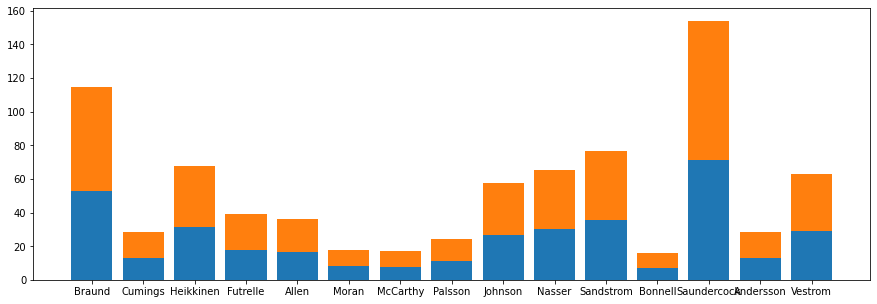

In [66]:
plt.figure(figsize=(15,5))
plt.bar(df3['Name'].head(15),df3['Fare'].head(15))
plt.bar(df3['Name'].head(15),df3['New_Fare'].head(15),bottom = df3['Fare'].head(15))


Text(0, 0.5, 'Fare')

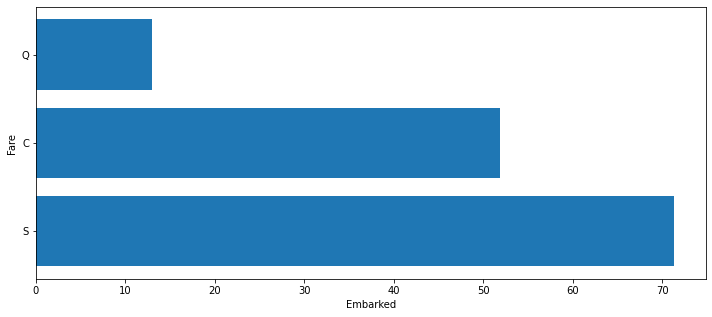

In [67]:
plt.figure(figsize = (12,5))
plt.barh(df3['Embarked'],df3['Fare'])
plt.xlabel("Embarked")
plt.ylabel("Fare")

3    15
1     5
2     5
Name: Pclass, dtype: int64


([<matplotlib.patches.Wedge at 0x7feff7732550>,
 [Text(-0.33991877217145816, 1.046162142464278, '3'),
  Text(-0.33991852729952715, -1.04616222202798, '1'),
  Text(0.8899188088302002, -0.6465636192133282, '2')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.00%'),
  Text(-0.18541010579974207, -0.5706339392879891, '20.00%'),
  Text(0.48541025936192733, -0.3526710650254517, '20.00%')])

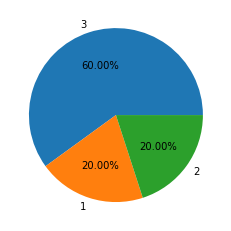

In [90]:
data2 = df3['Pclass'].value_counts()
print(data2)
plt.pie(data2.values,labels = data2.index,autopct = "%1.2f%%")

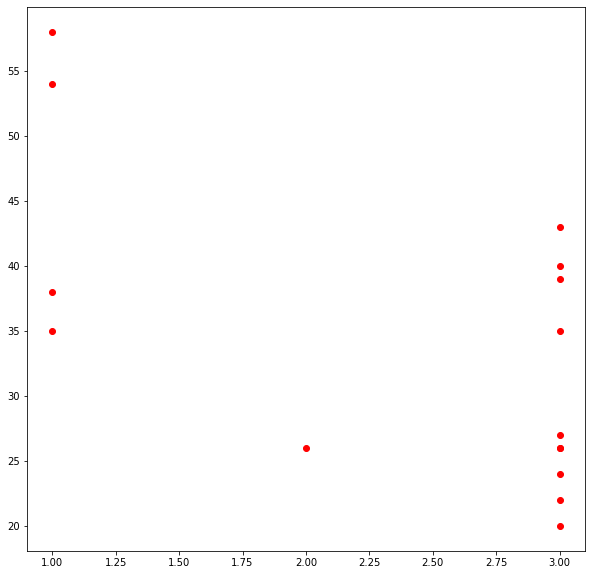

In [77]:
plt.figure(figsize=(10,10))
plt.plot(df3["Pclass"].head(15),df3["Age"].head(15),color = "red",linewidth = 0,marker = 'o')


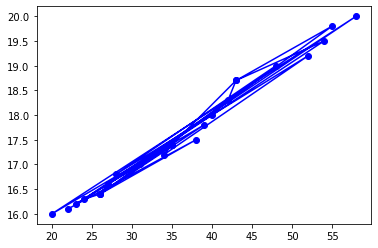

In [84]:
# plt.figure(figsize = (10,10))
plt.plot(df3["Age"],df3['Concession'],marker ="o",color = "blue")

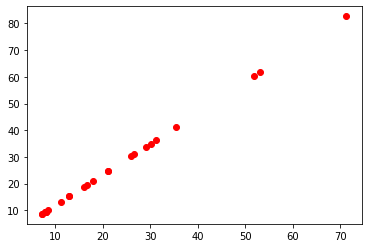

In [85]:
plt.scatter(df3["Fare"],df3["New_Fare"],color = "red")

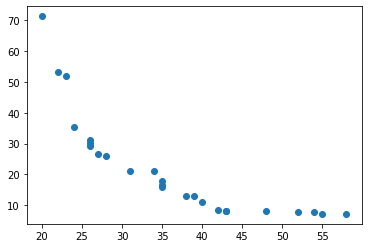

In [86]:
plt.scatter(df3["Age"],df3["Fare"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7feff7806b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7feff7815130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feff78063d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feff78156d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feff78159a0>],
 'means': []}

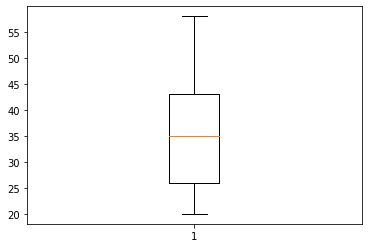

In [88]:
plt.boxplot(df3["Age"])

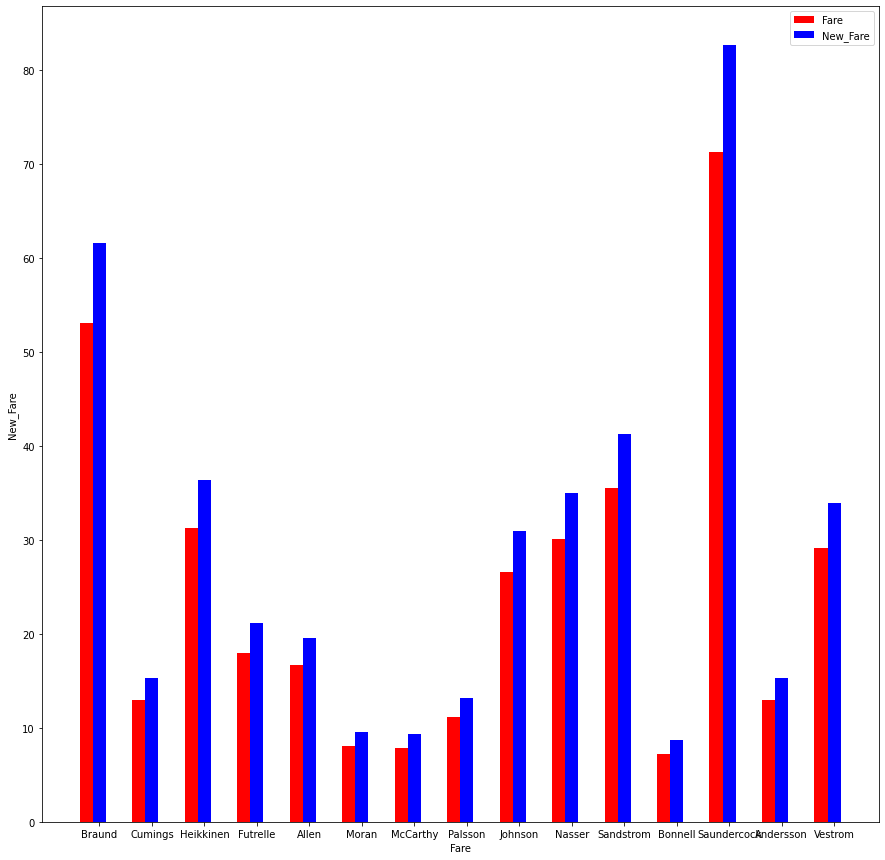

In [109]:
N=15
plt.figure(figsize = (15,15))
inde = np.arange(N)
x1 = df3["Fare"].head(15)
y1 = df3["New_Fare"].head(15)
width = 0.25
xbar = plt.bar(inde,x1,width,color='r')
ybar = plt.bar(inde+width,y1,width,color='blue')
plt.xticks(ind+width,df3['Name'].head(15))
plt.xlabel("Fare")
plt.ylabel("New_Fare")
plt.legend((xbar,ybar),('Fare','New_Fare'))

